                                                  Flux Balnac Analysis Project 


<span style="color:purple"> Project Purpose: Is to test the metabolic model data of 20z WT bacterial strain, which is a microbe that require a present of C source to grow, to have the highest yield of biomass. 
###### Tools: Using python_based tools Jupyter Notebook (python) with multiple packges and libraries. COPRA is one of python packages that use for testing a motibolic pathway data "a constraint-based metabolic model used to simulate cellular metabolism." In puplication,COPRA knowen as genome-scale metabolic models.


###### Carbon Efficiency was calculated based on seven different substrate that has C by using excel:

| **Substrate**                                        | **Carbon Efficiency (%)** | **Growth Rate** |
| ---------------------------------------------------- | ------------------------- | --------------- |
| Methanol (15 mM)                                     | 61.09                     | 0.2096          |
| Acetate (15 mM)                                      | 0                         | 0               |
| Formate (25 mM)                                      | 0                         | 0               |
| Methanol (15 mM) + Acetate (15 mM)                   | 47.20                     | 0.4859          |
| Methanol (15 mM) + Formate (25 mM)                   | 37.60                     | 0.344           |
| Acetate (15 mM) + Formate (25 mM)                    | 0                         | 0               |
| Methanol (15 mM) + Acetate (15 mM) + Formate (25 mM) | 40.34                     | 0.6459          |


######                                 <span style="color:purple">  Carbon Efficiency= (C in biomass/C uptake)​×100
###### Substrate represent the carbon source and the concentration 

##### This link used for this project https://cobrapy.readthedocs.io/en/latest/. 
##### https://cobrapy-cdiener.readthedocs.io/en/latest/dfba.html , https://cobrapy-cdiener.readthedocs.io/en/latest/dfba.html, https://modelseedpy.readthedocs.io/en/latest/flux_analysis/FBAExampleNotebook.html, https://opencobra.github.io/cobratoolbox/stable/tutorials/base/primer/practical_COBRA_primer.html, https://opencobra.github.io/cobratoolbox/stable/tutorials/tutorial_FBA.html, https://opencobra.github.io/cobratoolbox/stable/tutorials/tutorial_practical_FBA.html. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html.



Some of the codes were came from COPRApy Tutorils and Githup.  


In [70]:
from cobra.io import read_sbml_model, save_json_model
import matplotlib.pyplot as plt
import pandas as pd 
!pip install openpyxl


In [71]:
model = read_sbml_model('fbc_iIA409_20Z.xml')
model.solver = 'cplex'


<span style="color:purple">The code below were used to get some information about the metabolic data we have, such as the number of reactions, metabolites, and genes.</span>


In [72]:
model

Name,model
Memory address,7d7713ebf1c0
Number of metabolites,423
Number of reactions,436
Number of genes,409
Number of groups,0
Objective expression,1.0*BOF - 1.0*BOF_reverse_2629d
Compartments,"e, p, c"


##### The above results means:
###### Number of metabolites	423 — the number of distinct chemical compounds (e.g., glucose, pyruvate, ATP) in the network.
###### Number of reactions	436 — biochemical reactions, including metabolic conversions, transport steps, and exchanges.
###### Number of genes	409 — genes linked to enzymes that catalyze reactions in the model.
###### Number of groups	0 — for organizing reactions/metabolites
###### Objective expression	1.0*BOF - 1.0*BOF_reverse_2629d — this means the model is maximizing biomass (BOF = Biomass Objective Function), while accounting for potential reversibility (common in cobrapy models converted from SBML).
###### Compartments	e (extracellular), p (periplasm), c (cytoplasm) — where metabolites are located. This affects transport and flux directionality.

In [73]:
model.optimize()

,fluxes,reduced_costs
EX_ch4_e,-1.170000e+01,-0.025670
EX_o2_e,-1.377180e+01,0.000000
EX_meoh_e,0.000000e+00,-0.032043
MEohtep,0.000000e+00,0.000000
EX_c2h6_e,0.000000e+00,-0.061961
...,...,...
EX_Acet,0.000000e+00,-0.045438
EX_CO2,5.024195e+00,0.000000
EX_ADENOSYLCOBALAMIN,0.000000e+00,0.000000
EX_ADENOSYLCOBINAMIDE-GDP,-9.460524e-09,0.000000


##### The above code used to predict the growth rates and stimulation of gene knockouts and metabolic capabilities. Negative flux means the substrate were added to the rxn while the positive flux means the that the value was produced. Zero flu means that the value was taken up and secreated equally. Very small flux means not active <span style="color:purple"> The objective value=0.150/hr which represent the growth rate and biomass production.The reduced coast= 0 means the rxn flux in the optimal value. When the cost is less than 0 at 0 flux means increasing the flux will improve the objective in the flux is limitted. <span style="color:black">Analysis source https://www.nature.com/articles/nprot.2011.308

In [74]:
save_json_model(model, 'DS_20z_WT_model.json')

#### The code above used to save the model as a json format, so can be use latter. Also, Saving the model to a file formate can reload it later without repeating all preprocessing steps. In addition to exporting the model to use with other tools like Escher.

#### <span style="color:Red"> As an additional visualization method for the data, I used ESCHER. https://escher.github.io/  The figure below is showing the growth map of the model without any modifications (it works as a control for the project). The map is showing the rxn that has flux in the model ( the colored rns). The rxns withut color could be blocked or inactive pathways or the model missing substrate. Also, it could not be included in the model or the map. In Escher website, i dowloded the json data, and the rxn Id and flux comparing them into standerd E.Coli model. 


![Metabolic Animation](05-12_e_coli_core.Core%20metabolism-Standard.gif)


 

#### The code below used to have all the rxns in the model with their flux value. This code required panda library. it is asking to have all rxn id with their flux. then print out the flux values from highest to lowest. 

In [76]:
fluxes = solution.fluxes
with pd.option_context('display.max_rows', None):
    print(fluxes.sort_values(ascending=False))

RESPCOX                      4.675576e+01
EX_CO2                       4.511676e+01
PMF                          3.475576e+01
CYTCCOX                      3.175576e+01
CYTBCCYTC                    3.175576e+01
CYTBCQH2                     3.175576e+01
NDHQH2                       3.175576e+01
PPE                          2.672228e+01
HPI                          2.670018e+01
HPS                          2.670018e+01
MXA                          2.670000e+01
FALDtpc                      2.670000e+01
FDH                          2.446924e+01
O2tec                        2.340137e+01
PFK_ppi                      1.974948e+01
FBA                          1.974866e+01
GAPD                         1.784091e+01
PGK                          1.784091e+01
PDH                          1.769848e+01
PGM                          1.715091e+01
ENO                          1.714844e+01
PYK                          1.651608e+01
ADK1                         1.551611e+01
ASCA                         1.500

In [75]:
fluxes.sort_values(ascending=False).to_excel('DS_Fluxes_rxns.xlsx', header=True)

#### The above code used to save the output list of rxns id and their flux values in excel format so i can use them later. this code also belong to panda library and require !pip install openpyxl 

                             Testing The Substrate Concentration (The Seven Testing Conditions)

##### first step, i found it is critical to designe a dictionary for seven testing conditions data because they are like a key and a value. this can help me working with the data.

In [77]:
conditions = {
    "Methanol": {"EX_meoh_e": -15, "EX_Acet": 0, "EX_FORMATE": 0},
    "Acetate": {"EX_meoh_e": 0, "EX_Acet": 0, "EX_FORMATE": 0},
    "Formate": {"EX_meoh_e": 0, "EX_Acet": 0, "EX_FORMATE": -25},
    "Methanol + Acetate": {"EX_meoh_e": -15, "EX_Acet": -15, "EX_FORMATE": 0},
    "Methanol + Formate": {"EX_meoh_e": -15, "EX_Acet": 0, "EX_FORMATE": -15},
    "Acetate + Formate": {"EX_meoh_e": 0, "EX_Acet": -15, "EX_FORMATE": -25},
    "Methanol + Acetate + Formate": {"EX_meoh_e": -15, "EX_Acet": -15, "EX_FORMATE": -25},
}


##### <span style="color:black"> Here I have started testing each substrate that we are intrested in. In the first step I set the concetration valuses that we want to test in the model. I set the ex_meoh_e to 15 mmol and the negative because we are adding the substrate as reactant(uptake) and the rxn is revesible as we know from the optimization results. Both Formate and Acetate are zero. After I designed the dictionary above, I came with the idea of using for loop to test the seven substrate instead of testing each condition indivdually. I first started with desgning the for loop: at the beginning, the code will start from the condition name in the dictionary and their bound values, after that it will print the name of the condition test using print, so i can disnguish the results for each one. Then another for loop to go over each condtions based on their id name and set the value to zero, so for each test the loop start from zero therfor no carry over. Another foor loop to go rxn id and test it for the given bound (lower bounds). run the model based on their solution= model.optimize to find the maximizing growth. Then, I added the print to give me the results for the groeth rate at each condtions for 2 dicmal place. then, i did asked for the highest 20 flux rxns at that test conditions. 

In [93]:

for condition_name, bounds in conditions.items():
    print(f"\n*** Condition: {condition_name} ***")

    for rxn_id in ["EX_meoh_e", "EX_Acet", "EX_FORMATE"]:
        model.reactions.get_by_id(rxn_id).lower_bound = 0
    for rxn_id, value in bounds.items():
        model.reactions.get_by_id(rxn_id).lower_bound = value
    solution = model.optimize()
    
    growth_rate = solution.objective_value
    print(f"Growth rate: {growth_rate:.2f} /hr ")
    
    print("Top fluxes:")
    for rxn_id, flux in solution.fluxes.sort_values(ascending=False).head(20).items():
        print(f"{rxn_id}: {flux:.2f}")



*** Condition: Methanol ***
Growth rate: 0.36 /hr 
Top fluxes:
FALDtpc: 26.70
MXA: 26.70
HPS: 26.47
HPI: 26.47
RESPCOX: 22.39
PPE: 20.41
EX_h2o_e: 19.27
H2Otep: 19.27
MEohtep: 15.00
COXOX: 15.00
CYTCLEL: 11.70
pMMO: 11.70
O2tep: 11.70
CH4tep: 11.70
O2tec: 11.21
EX_CO2: 10.76
PFK_ppi: 10.63
FBA: 10.63
PDH: 10.41
PMF: 10.39

*** Condition: Acetate ***
Growth rate: 0.15 /hr 
Top fluxes:
pMMO: 11.70
FALDtpc: 11.70
MXA: 11.70
CH4tep: 11.70
O2tep: 11.70
CYTCLEL: 11.70
HPI: 11.60
HPS: 11.60
EX_h2o_e: 9.54
H2Otep: 9.54
PPE: 9.07
EX_CO2: 5.02
PDH: 4.88
PFK_ppi: 4.84
FBA: 4.84
PGK: 4.49
GAPD: 4.49
PGM: 4.37
ENO: 4.37
PYK: 4.25

*** Condition: Formate ***
Growth rate: 0.28 /hr 
Top fluxes:
EX_CO2: 24.07
FDH: 20.01
H2Otep: 13.91
EX_h2o_e: 13.91
CYTBCCYTC: 11.96
PMF: 11.96
RESPCOX: 11.96
CYTCCOX: 11.96
CYTBCQH2: 11.96
NDHQH2: 11.96
PPE: 11.71
HPI: 11.70
HPS: 11.70
O2tep: 11.70
pMMO: 11.70
CH4tep: 11.70
CYTCLEL: 11.70
FALDtpc: 11.70
MXA: 11.70
PGM: 11.39

*** Condition: Methanol + Acetate ***
Growt

#### The code above is showing the results for the growth rate after blocking formate uptake, while methenol and acetate have 15mmol concentration. The output showes incrase in the growth rate comparing to the objective value=0.150. the difference in the growth is by 0.512/hr. The predicted growth rate is close to our first calculations (see 1st cell in this notebook). ALso, the highest 20 top flux rxns at that substrate.  

In [94]:

methanol_flux = abs(solution.fluxes["EX_meoh_e"])  
acetate_flux = abs(solution.fluxes["EX_Acet"])    


C_methanol = 1
C_acetate = 2


carbon_in = (methanol_flux * C_methanol) + (acetate_flux * C_acetate)


biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")


Carbon efficiency: 0.91%


##### The code above used to get results for the Crbone efficieny. First step I started with assigning the the valuse for methanol and acetate flux. I used abs to get the absolute value for the uptake values that I used previously. the sloution.fluxes is the object that I assigned to have all the fluxes values for the rxns after the obtimization. Then I gave the number of C in meoh and Ace. I entered the meathmatical equation that we used for the predication calculation in xlsx. The results show that the carbon efficiency = 0.74% which is lower than the growth rate and lower than the excpcted value. High growth and low C efficiency  it means that the microbe is growing very fast and a lot of biomass was produced. During the process C was fully consumed and very small yield because : 1- C fully burned, 2-produces as by product, 3- wasted → overflow metabolism 

In [101]:
methanol_flux = abs(solution.fluxes["EX_meoh_e"])  
formate_flux = abs(solution.fluxes["EX_FORMATE"])    


C_methanol = 1
C_formate= 1


carbon_in = (methanol_flux * C_methanol) + (formate_flux * C_formate)


biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")

Carbon efficiency: 1.03%


In [98]:
methanol_flux = abs(solution.fluxes["EX_meoh_e"])  
acetate_flux = abs(solution.fluxes["EX_Acet"])  
formate_flux = abs(solution.fluxes["EX_FORMATE"])  

C_methanol = 1
C_acetate = 2
C_formate= 1

carbon_in = (methanol_flux * C_methanol) + (acetate_flux * C_acetate)+ (formate_flux * C_formate)
 

biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")

Carbon efficiency: 0.59%


In [102]:
methanol_flux = abs(solution.fluxes["EX_meoh_e"])
C_methanol = 1
carbon_in = (methanol_flux * C_methanol)
biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")

Carbon efficiency: 2.74%


In [106]:
acetate_flux = abs(solution.fluxes["EX_Acet"])  
formate_flux = abs(solution.fluxes["EX_FORMATE"])  

C_acetate = 2
C_formate= 1

carbon_in =  (acetate_flux * C_acetate)+ (formate_flux * C_formate)
 

biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")

Carbon efficiency: 0.75%


In [109]:
acetate_flux = abs(solution.fluxes["EX_Acet"])  
 

C_acetate = 2


carbon_in =  (acetate_flux * C_acetate)
 

biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")

Carbon efficiency: 1.37%


In [110]:

formate_flux = abs(solution.fluxes["EX_FORMATE"])  


C_formate= 1

carbon_in = (formate_flux * C_formate)
 

biomass_flux = solution.objective_value  
carbon_fraction = 0.5  

carbon_out = biomass_flux * carbon_fraction

carbon_efficiency = (carbon_out / carbon_in) * 100 
if carbon_in > 0:
    carbon_efficiency = (carbon_out / carbon_in) * 100
else:
    carbon_efficiency = 0
print(f"Carbon efficiency: {carbon_efficiency:.2f}%")

Carbon efficiency: 1.65%


#### In order to graph the data of the growth rare: i used import matplotlib.pyplot as plt which is a visualization library that has pyplot package. Then, i started by having an empty list to stor the growth rate values. I wrote the for loop again to loop through each conditions (dictionary conditions again) and put the value their. Basically I repated the previouse for loop and added an empty list in the top. After that I used these two codes to call and use the growth rates and conditions: conditions_list = list(growth_results.keys()), growth_values = list(growth_results.values()). The, I steup the figure title and x and y. also, the font and color size. 

In [80]:
growth_results = {}

for condition_name, bounds in conditions.items():
    for rxn_id in ["EX_meoh_e", "EX_Acet", "EX_FORMATE"]:
        model.reactions.get_by_id(rxn_id).lower_bound = 0
    for rxn_id, value in bounds.items():
        model.reactions.get_by_id(rxn_id).lower_bound = value

    solution = model.optimize()
    if solution.status != 'optimal':
        growth_results[condition_name] = 0
        continue
        
    growth_results[condition_name] = solution.objective_value


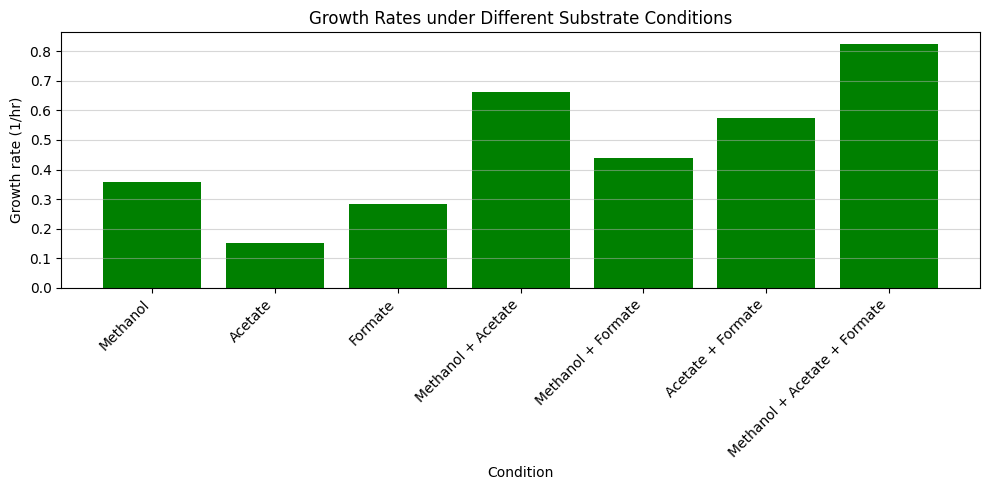

In [81]:
conditions_list = list(growth_results.keys())
growth_values = list(growth_results.values())

plt.figure(figsize=(10, 5))
plt.bar(conditions_list, growth_values, color='green')
plt.xlabel("Condition")
plt.ylabel("Growth rate (1/hr)")
plt.title("Growth Rates under Different Substrate Conditions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis='y', alpha=0.5)
plt.show()


##### In the two below codes, i have decided to make the results of both carbone efficincy and growth rate in alist. Therefore, i can have both data results in one graph. I used panda for this purpose. pd.DataFrame() is data table that write the data as rows and columns. both conditions and carbon efficiency are columns. Then I learned about this code from df.to_dict(orient='records' from this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_dict.html. following the same steps, i did it for the growth rate. 

In [129]:
df = pd.DataFrame({
    "Condition": [
        "Methanol", "Acetate", "Formate",
        "Methanol + Acetate", "Methanol + Formate",
        "Acetate + Formate", "Methanol + Acetate + Formate"
    ],
    "Carbon Efficiency (%)": [
        1.195406, 0.688253, 0.568111,
        0.736150, 0.733354, 0.520819, 0.587794
    ]
})

carbon_efficiency_list = df.to_dict(orient='records')

print(carbon_efficiency_list)


[{'Condition': 'Methanol', 'Carbon Efficiency (%)': 1.195406}, {'Condition': 'Acetate', 'Carbon Efficiency (%)': 0.688253}, {'Condition': 'Formate', 'Carbon Efficiency (%)': 0.568111}, {'Condition': 'Methanol + Acetate', 'Carbon Efficiency (%)': 0.73615}, {'Condition': 'Methanol + Formate', 'Carbon Efficiency (%)': 0.733354}, {'Condition': 'Acetate + Formate', 'Carbon Efficiency (%)': 0.520819}, {'Condition': 'Methanol + Acetate + Formate', 'Carbon Efficiency (%)': 0.587794}]


In [130]:
df = pd.DataFrame({
    "Condition": [
        "Methanol", "Acetate", "Formate",
        "Methanol + Acetate", "Methanol + Formate",
        "Acetate + Formate", "Methanol + Acetate + Formate"
    ],
    "Growth Rate (mmo/gCDW/hr)": [
        0.36, 0.15, 0.28, 0.66, 0.44, 0.57, 0.82
    ]
})

growth_rate_list = df.to_dict(orient='records')

print(growth_rate_list)


[{'Condition': 'Methanol', 'Growth Rate (mmo/gCDW/hr)': 0.36}, {'Condition': 'Acetate', 'Growth Rate (mmo/gCDW/hr)': 0.15}, {'Condition': 'Formate', 'Growth Rate (mmo/gCDW/hr)': 0.28}, {'Condition': 'Methanol + Acetate', 'Growth Rate (mmo/gCDW/hr)': 0.66}, {'Condition': 'Methanol + Formate', 'Growth Rate (mmo/gCDW/hr)': 0.44}, {'Condition': 'Acetate + Formate', 'Growth Rate (mmo/gCDW/hr)': 0.57}, {'Condition': 'Methanol + Acetate + Formate', 'Growth Rate (mmo/gCDW/hr)': 0.82}]


##### now, I have the two lists, so I can graph the data by also using panda, I need to use this code df = pd.merge from this website https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html. What this code does is merging the data and have them as one table, so the code can have them at the same graph.

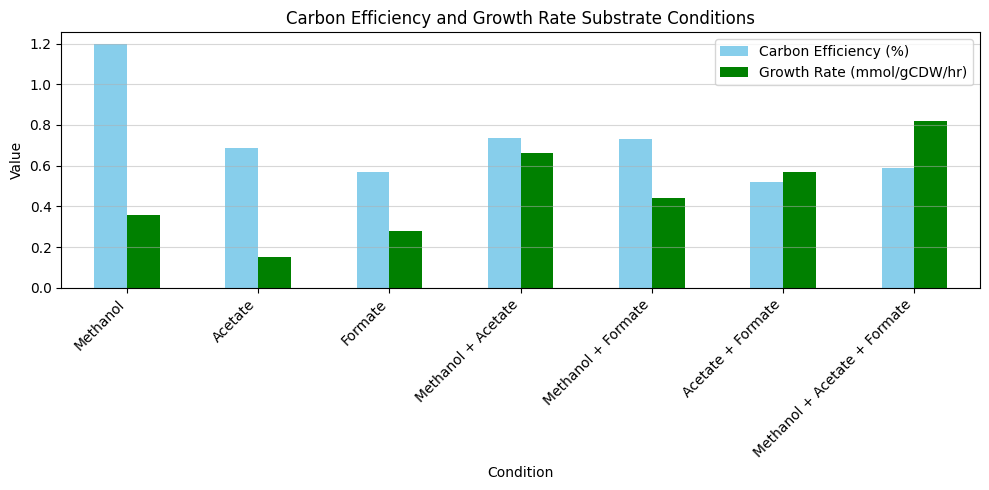

In [136]:

carbon_efficiency_data = [
    {'Condition': 'Methanol', 'Carbon Efficiency (%)': 1.195406},
    {'Condition': 'Acetate', 'Carbon Efficiency (%)': 0.688253},
    {'Condition': 'Formate', 'Carbon Efficiency (%)': 0.568111},
    {'Condition': 'Methanol + Acetate', 'Carbon Efficiency (%)': 0.73615},
    {'Condition': 'Methanol + Formate', 'Carbon Efficiency (%)': 0.733354},
    {'Condition': 'Acetate + Formate', 'Carbon Efficiency (%)': 0.520819},
    {'Condition': 'Methanol + Acetate + Formate', 'Carbon Efficiency (%)': 0.587794}
]

growth_rate_data = [
    {'Condition': 'Methanol', 'Growth Rate (mmol/gCDW/hr)': 0.36},
    {'Condition': 'Acetate', 'Growth Rate (mmol/gCDW/hr)': 0.15},
    {'Condition': 'Formate', 'Growth Rate (mmol/gCDW/hr)': 0.28},
    {'Condition': 'Methanol + Acetate', 'Growth Rate (mmol/gCDW/hr)': 0.66},
    {'Condition': 'Methanol + Formate', 'Growth Rate (mmol/gCDW/hr)': 0.44},
    {'Condition': 'Acetate + Formate', 'Growth Rate (mmol/gCDW/hr)': 0.57},
    {'Condition': 'Methanol + Acetate + Formate', 'Growth Rate (mmol/gCDW/hr)': 0.82}
]

df_c_eff = pd.DataFrame(carbon_efficiency_data)
df_r_growth = pd.DataFrame(growth_rate_data)

df = pd.merge(df_c_eff, df_r_growth, on="Condition")


df.plot(
    kind='bar',
    x='Condition',
    y=['Carbon Efficiency (%)', 'Growth Rate (mmol/gCDW/hr)'],
    figsize=(10, 5),
    color=['skyblue', 'green']
)

plt.title("Carbon Efficiency and Growth Rate Substrate Conditions")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


| Condition                                         | Carbon Efficiency (%) | Growth Rate (mmol/gCDW/hr) |
| ----------------------------                      | --------------------- | ------------------------- |
| Methanol  (15mM)                                  | 1.195406              | 0.36                      |
| Acetate   (15mM)                                  | 0.688253              | 0.15                      |
| Formate    (25mM)                                 | 0.568111              | 0.28                      |
| Methanol (15mM)  + Acetate (15mM)                 | 0.736150              | 0.66                      |
| Methanol (15mM) + Formate  (25mM)                 | 0.733354              | 0.44                      |
| Acetate (15mM) + Formate  (25mM)                  | 0.520819              | 0.57                      |
| Methanol(15mM)  + Acetate (15mM) + Formate (25mM) | 0.587794              | 0.82                      |
